In [1]:
# Basic libraries import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15,12


In [2]:
# import the dataset
data = pd.read_csv('CreditCard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#missing value
print(data.isnull().sum())
print(data['Class'].value_counts())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0    284315
1       492
Name: Class, dtype: int64


In [6]:
# parcentage of fraud
outliar =492/(284315+492)
outliar

0.001727485630620034

In [6]:
# pip install pandas-profiling

In [8]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file = 'output.html')

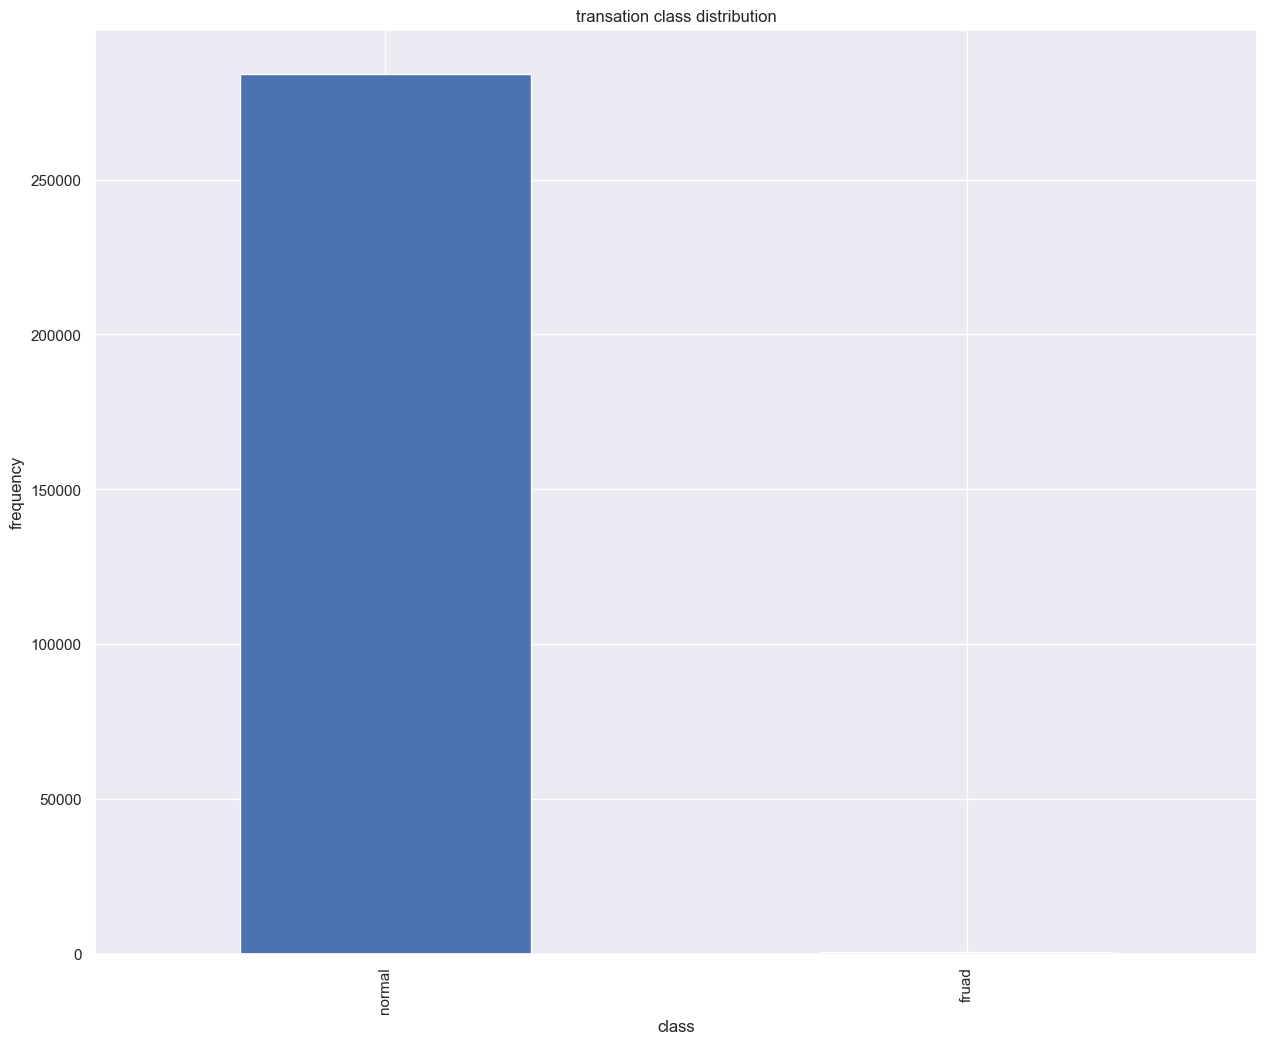

In [8]:
# bar plot fraud vs normal transation
count_cls = pd.value_counts(data['Class'],sort =True)
count_cls.plot(kind='bar',rot=90 )
plt.title('transation class distribution')
plt.xticks(range(2),['normal','fruad'])
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()

In [12]:
# discribe fraud and normal amount
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
print(fraud.Amount.describe())
print()
print(normal.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


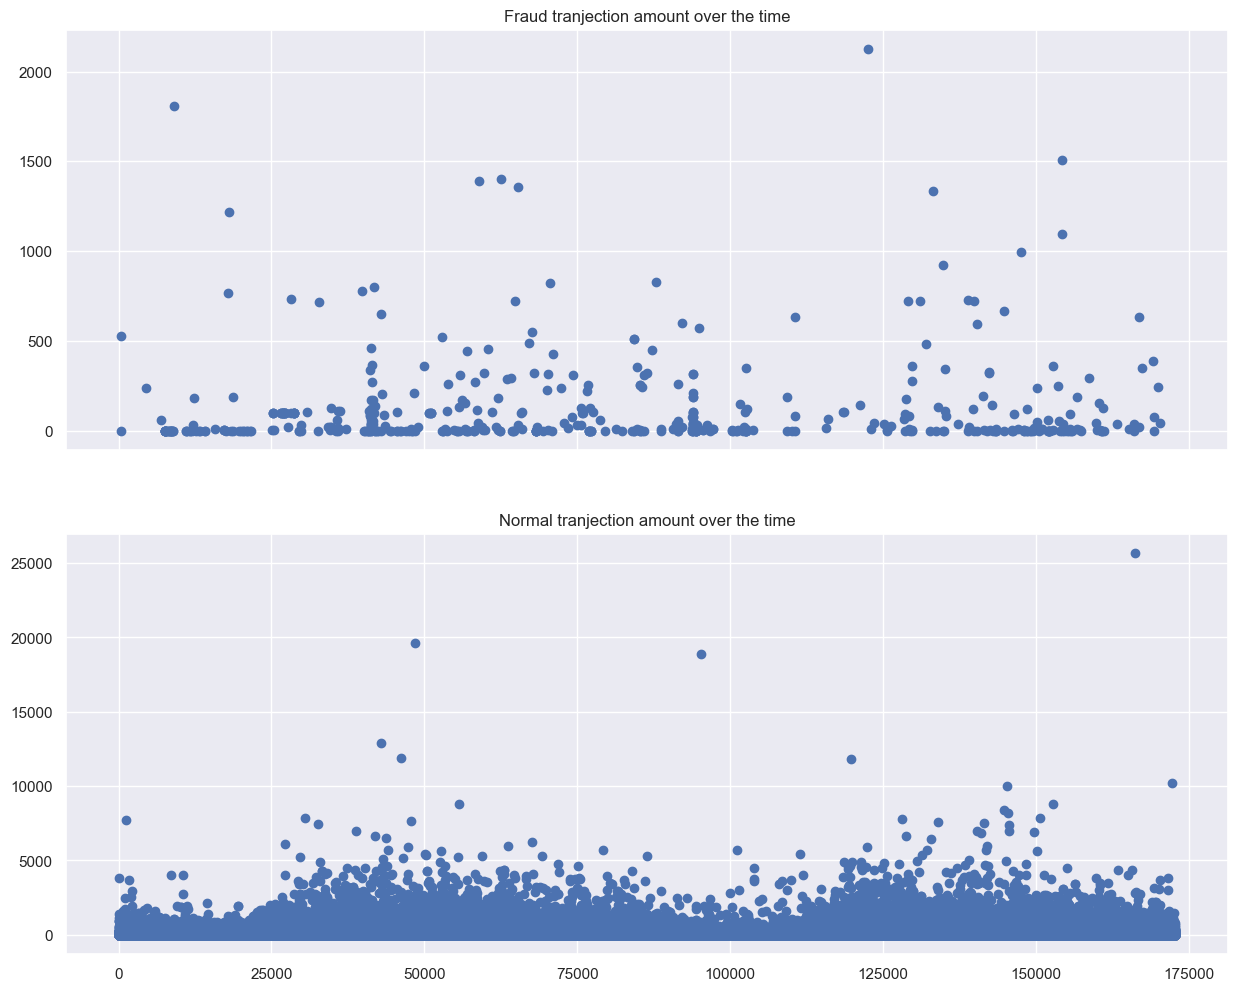

In [19]:
# bar plot time wise
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.set_title('Fraud tranjection amount over the time')
ax1.scatter(fraud.Time,fraud.Amount)
ax2.set_title('Normal tranjection amount over the time')
ax2.scatter(normal.Time, normal.Amount)

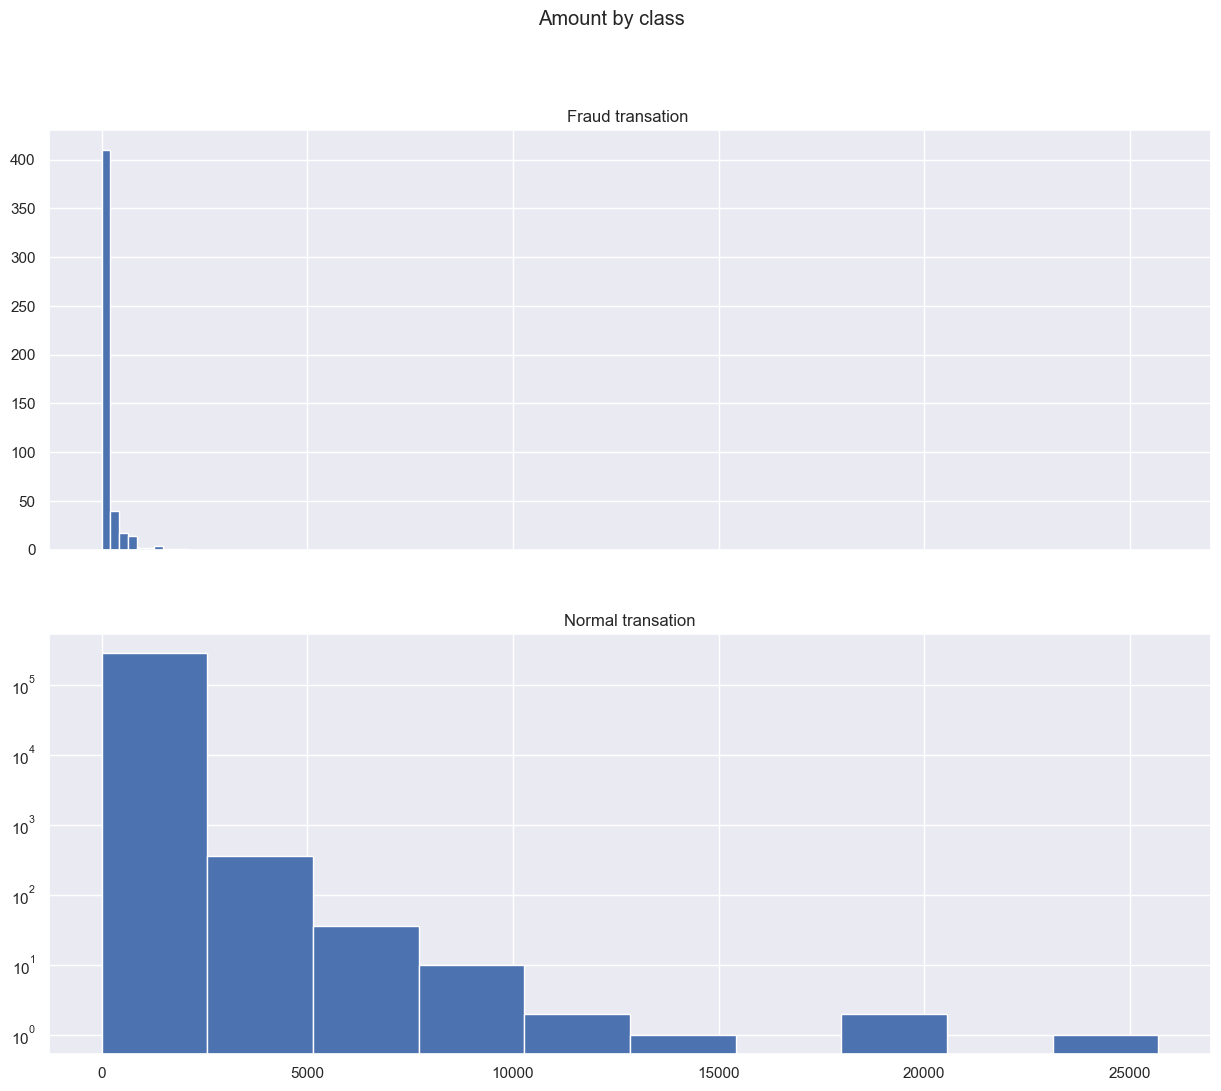

In [22]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount by class')
bins = 50
ax1.hist(fraud.Amount)
ax1.set_title('Fraud transation ')

ax2.hist(normal.Amount)
ax2.set_title('Normal transation')
plt.yscale('log')
plt.show()

In [23]:
columns = data.iloc[:,:-1]
target = data.iloc[:,-1]

In [24]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns, target, train_size=0.75,random_state=125, stratify=target)


In [25]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_train,y_train_pred),'train confusion matrix ')
print()
print(confusion_matrix(y_test,y_test_pred),'test confusion matrix ')

[[213114    122]
 [   110    259]] train confusion matrix 

[[71044    35]
 [   47    76]] test confusion matrix 


In [32]:
# classification report
print(classification_report(y_train,y_train_pred),"for training")
print("8888888888888888888888888888888888888888888888888888888888888888888888")
print(classification_report(y_test,y_test_pred),"for test")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.68      0.70      0.69       369

    accuracy                           1.00    213605
   macro avg       0.84      0.85      0.85    213605
weighted avg       1.00      1.00      1.00    213605
 for training
8888888888888888888888888888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.68      0.62      0.65       123

    accuracy                           1.00     71202
   macro avg       0.84      0.81      0.82     71202
weighted avg       1.00      1.00      1.00     71202
 for test


In [33]:
print("Accuracy - Training :", accuracy_score(y_train, y_train_pred))
print("*****************************")
print("Accuracy - Test :", accuracy_score(y_test, y_test_pred))

Accuracy - Training : 0.9989138831019874
*****************************
Accuracy - Test : 0.9988483469565461


In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_train_pred_dt = dtree.predict(x_train)
y_test_pred_dt = dtree.predict(x_test)

In [36]:
# classification report
print(classification_report(y_train,y_train_pred_dt),"for training")
print("8888888888888888888888888888888888888888888888888888888888888888888888")
print(classification_report(y_test,y_test_pred_dt),"for test")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       1.00      1.00      1.00       369

    accuracy                           1.00    213605
   macro avg       1.00      1.00      1.00    213605
weighted avg       1.00      1.00      1.00    213605
 for training
8888888888888888888888888888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.70      0.73       123

    accuracy                           1.00     71202
   macro avg       0.88      0.85      0.86     71202
weighted avg       1.00      1.00      1.00     71202
 for test


# ensemble learning- bagging

In [37]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()
bgcl.fit(x_train, y_train)

BaggingClassifier()

In [39]:
y_train_pred_bg = bgcl.predict(x_train)
y_test_pred_bg = bgcl.predict(x_test)

In [40]:
# classification report
print(classification_report(y_train,y_train_pred_bg),"for training")
print("8888888888888888888888888888888888888888888888888888888888888888888888")
print(classification_report(y_test,y_test_pred_bg),"for test")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.99      0.96      0.97       369

    accuracy                           1.00    213605
   macro avg       1.00      0.98      0.99    213605
weighted avg       1.00      1.00      1.00    213605
 for training
8888888888888888888888888888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.73      0.82       123

    accuracy                           1.00     71202
   macro avg       0.96      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202
 for test


In [42]:
# from sklearn.ensemble import BaggingClassifier using DecisionTreeClassifier
bgcltree = BaggingClassifier(base_estimator=dtree,n_estimators=50,random_state=1)
bgcltree.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=50, random_state=1)

In [43]:
# fit the model
y_train_pred_bgtree = bgcltree.predict(x_train)
y_test_pred_bgtree = bgcltree.predict(x_test)

In [30]:
# classification report
print(classification_report(y_train,y_train_pred_bgtree),"for training")
print("8888888888888888888888888888888888888888888888888888888888888888888888")
print(classification_report(y_test,y_test_pred_bgtree),"for test")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.68      0.70      0.69       369

    accuracy                           1.00    213605
   macro avg       0.84      0.85      0.85    213605
weighted avg       1.00      1.00      1.00    213605
 for training
8888888888888888888888888888888888888888888888888888888888888888888888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.68      0.62      0.65       123

    accuracy                           1.00     71202
   macro avg       0.84      0.81      0.82     71202
weighted avg       1.00      1.00      1.00     71202
 for test


# ensemble learning adaboosting method

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state= 1)
adbcl.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [32]:
# fit the model
y_train_pred_adbcl = adbcl.predict(x_train)
y_test_pred_adbcl = adbcl.predict(x_test)

In [33]:
print(classification_report(y_train, y_train_pred_adbcl))
print("*****************************"*5)
print(classification_report(y_test, y_test_pred_adbcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.82      0.77      0.80       369

    accuracy                           1.00    213605
   macro avg       0.91      0.89      0.90    213605
weighted avg       1.00      1.00      1.00    213605

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.63      0.69       123

    accuracy                           1.00     71202
   macro avg       0.88      0.81      0.84     71202
weighted avg       1.00      1.00      1.00     71202




# gradient boosting classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [35]:
# fit the model
y_train_pred_gbcl = gbcl.predict(x_train)
y_test_pred_gbcl = gbcl.predict(x_test)

In [36]:
print(classification_report(y_train, y_train_pred_gbcl))
print("*****************************"*5)
print(classification_report(y_test, y_test_pred_gbcl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.81      0.76      0.79       369

    accuracy                           1.00    213605
   macro avg       0.91      0.88      0.89    213605
weighted avg       1.00      1.00      1.00    213605

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.66      0.71       123

    accuracy                           1.00     71202
   macro avg       0.89      0.83      0.86     71202
weighted avg       1.00      1.00      1.00     71202



# XGBOOst

In [37]:
from xgboost import XGBClassifier
xgbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
xgbcl.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# fit the model
y_train_pred_xgbcl = xgbcl.predict(x_train)
y_test_pred_xgbcl = xgbcl.predict(x_test)

In [ ]:
print(classification_report(y_train, y_train_pred_xgbcl))
print("*****************************"*5)
print(classification_report(y_test, y_test_pred_xgbcl))

# IsolationForest, LocalOutlierFactor, OneClassSVM

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM


In [ ]:
Classification = {"IsolationForest":IsolationForest(max_samples=len(columns),contamination=outliar),
                 "LocalOutlierFactor":LocalOutlierFactor(contamination = outliar),
                 "OneClassSVM":OneClassSVM()}


In [ ]:
n_outliar = len(fraud)
for i in (clf_name, clf) in enumerate(Classification.item()):
    if clf_name =='LocalOutlierFactor':
        y_pred = clf.fit_predict(columns)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =='OneClassSVM':
        clf.fit(columns)
        y_pred = clf.predict(columns)
    else:
        clf.fit(columns)
        score_prediction = clf.decision_function(columns)
        y_pred = clf.predict(columns)
        
    y_pred[y_pred==1]==0
    y_pred[y_pred ==-1]==1
    n_error = (y_pred!=target).sum()
    print('{} : {}'.format(clf_name,n_error))
    print(accuracy_score(target,y_pred))
    print(classification_report(target,y_pred))